In [1]:
%matplotlib notebook
#%load_ext line_profiler
import numpy as np
from numba import jit
from potentials import *
from distances import *
from sampling import *
from Langevin import *
from Velocity_Verlet import *
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

ModuleNotFoundError: No module named 'line_profiler'

In [2]:
def pot_gradient(coord, pbc=True,boxsize=(-10,10), sig=1, eps=1):
    vecs = vectors(coord, boxsize, pbc)
    return gradients.LJ(vecs, sig, eps) + gradients.harmonic(coord,boxsize, pbc, r0 =(0, 0), k=1)
def pot(coord, pbc=True,boxsize=(-10,10), sig=1, eps=1):
    vecs = vectors(coord, boxsize, pbc)
    dist = distances(vecs)
    return potentials.LJ(dist, eps, sig) + potentials.harmonic(coord, boxsize, pbc, r0 =(0, 0),k=1)

In [3]:
r_init = mcmc(pot,24, 2, 1, stepsize=0.01, beta=100, boxsize=(-10,10), pbc=True)
v_init = np.zeros_like(r_init)
masses = np.ones_like(r_init)
for i in range(0,len(r_init)):
    angle=2*np.pi/len(r_init)
    r_init[i]=[5*np.cos(angle*i),5*np.sin(angle*i)]
v_init=-5*r_init

r_matrix, v_matrix, a_matrix=vv1(pot_gradient, r_init, v_init, 1, 3, 0.0001,(-10,10))
langevin(pot_gradient, r_init, v_init, masses, 10, 0.001, 0, 1, (-10,10), pbc=True)

<IPython.core.display.Javascript object>


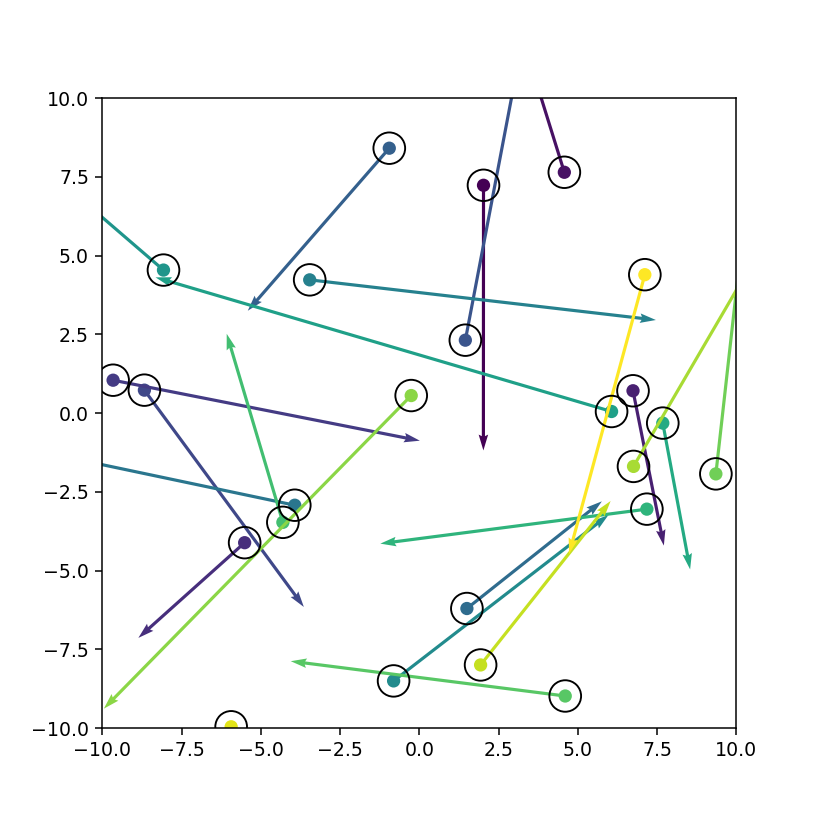

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=120)
anim = animation.FuncAnimation(fig, animate, interval=20, frames=38000, repeat=False)
#anim.save('LJ_Harmonic_Particles_PBC_Integrator_Super_Symmetric_Test2.mp4', writer=writer)